In [67]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql.functions import col, split

sc = pyspark.SparkContext('local[*]')

sqlContext = SQLContext(sc)
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('users_from_arizona.csv')


ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-1-f4c2851cfeba>:5 

In [102]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Tip").getOrCreate()

#tip_df = spark.read.json('/Users/shravya/data_mining/project/yelp_dataset/yelp_academic_dataset_tip.json')
reviews_df =spark.read.json('/Users/shravya/data_mining/project/yelp_dataset/yelp_academic_dataset_review.json')
#business_df =spark.read.json('/Users/shravya/data_mining/project/yelp_dataset/yelp_academic_dataset_business.json')
users_df =spark.read.json('/Users/shravya/data_mining/project/yelp_dataset/yelp_academic_dataset_user.json')
#checkin_df =spark.read.json('/Users/shravya/data_mining/project/yelp_dataset/yelp_academic_dataset_checkin.json')

print reviews_df.schema

StructType(List(StructField(business_id,StringType,true),StructField(cool,LongType,true),StructField(date,StringType,true),StructField(funny,LongType,true),StructField(review_id,StringType,true),StructField(stars,LongType,true),StructField(text,StringType,true),StructField(useful,LongType,true),StructField(user_id,StringType,true)))


In [69]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

size_ = udf(lambda xs: len(xs), IntegerType())
newDf = reviews_df.select(col("stars"), size_(col("text")).alias("text_count"), col("useful"))
newDf.head(5)


[Row(stars=2, text_count=449, useful=0),
 Row(stars=5, text_count=317, useful=0),
 Row(stars=1, text_count=156, useful=3),
 Row(stars=2, text_count=901, useful=2),
 Row(stars=5, text_count=165, useful=0)]

In [104]:
users_df = users_df.filter(col('friends') != 'None')
users_df.head(1)

[Row(average_stars=3.89, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite=u'None', fans=0, friends=u'YwaKGmRNnSa3R3N4Hf9jLw, NDjDKV7IWeqS_kvdlNS9zw, eArNPOynylyfcXxQqXag-g, 7NAKCkRMw8Qwke3BWOgE8A, syA7uYoDjohc7gWBWaEZmw, bvOicnFbku4B1mK12fIP6Q, wGcbKPOJYpnAB-Oi86_AtQ, ysvphNWLP0ZkXPOLrXw7Tg, gPnezUoB9AcxE_qeBR_Dsw, edJEj384w4_09sivk6VblA, rS91MRNTRGikL4_acEfdNQ, bMSePKFYwjslP18fFmeHnA, EOIrXIWKMFcdn_7CPBacDQ, SZTscGkXeemMSGz1hN369Q, 1H1Cn5utCE5jxI5BXfpxgw, qqx5YwBV8OlHlpU2yPFPnA, ZxYgNB6Nuj6R50gXewLw5w, OcpxS8U7evLWyfw1K2pwng, 3Ua7O424qU24smW7QcmFbw, sa4wUK8fbCLqiUq4rC0h9A, 4F0BijndBJDS0hQEmqfm_A, 44IPobgBDnZuFJoGD3LrUQ, ismGKdAF86dKAqMnrA9ehw, alUUlKTAKiNh-32E7k22eQ, RYkinABdGJ2t0zIEvyMtkg, Y9oNrUa4jWjAVVgDeEf43w, 9clBVewke08oNI85nZWqEg, R47JPwtASV1o6OOAkeyNPw, KcwRRhds7XQxYeWxVp4Azw, F4oZPZacaqhlXUDQl4xBH

In [72]:
print newDf.schema
newDf.stat.corr(str('text_count'),str('stars'))

StructType(List(StructField(stars,LongType,true),StructField(text_count,IntegerType,true),StructField(useful,LongType,true)))


-0.19298746326688193

In [73]:
users_df.stat.corr(str('review_count'), str('fans'))

0.557153081527723

In [74]:
users_df.stat.corr(str('review_count'), str('average_stars'))

-0.002956915413456407

In [75]:
users_df.stat.corr(str('average_stars'), str('fans'))

0.00588757734076139

In [105]:
users_df = users_df.withColumn("year", split(col('yelping_since'),"-")[0])
#users_df.head(5)

In [106]:
from pyspark.sql.types import *
import pyspark.sql.functions as funcs
import datetime

users_df = users_df.withColumn('yelping_since_year', (2018 - funcs.col("year")))
# users_df.head(1)

In [108]:
#users_df = users_df.withColumn(split(col("friends"), ",\s*").alias("friends"))
users_df = users_df.withColumn("friends_count",size(split(col("friends"), ",\s*")))
users_df = users_df.withColumn("elite_count", funcs.when(col("elite") == 'None',0).otherwise(size(split(col("elite"), ",\s*"))))
users_df.head(1)

[Row(average_stars=3.89, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite=u'None', fans=0, friends=u'YwaKGmRNnSa3R3N4Hf9jLw, NDjDKV7IWeqS_kvdlNS9zw, eArNPOynylyfcXxQqXag-g, 7NAKCkRMw8Qwke3BWOgE8A, syA7uYoDjohc7gWBWaEZmw, bvOicnFbku4B1mK12fIP6Q, wGcbKPOJYpnAB-Oi86_AtQ, ysvphNWLP0ZkXPOLrXw7Tg, gPnezUoB9AcxE_qeBR_Dsw, edJEj384w4_09sivk6VblA, rS91MRNTRGikL4_acEfdNQ, bMSePKFYwjslP18fFmeHnA, EOIrXIWKMFcdn_7CPBacDQ, SZTscGkXeemMSGz1hN369Q, 1H1Cn5utCE5jxI5BXfpxgw, qqx5YwBV8OlHlpU2yPFPnA, ZxYgNB6Nuj6R50gXewLw5w, OcpxS8U7evLWyfw1K2pwng, 3Ua7O424qU24smW7QcmFbw, sa4wUK8fbCLqiUq4rC0h9A, 4F0BijndBJDS0hQEmqfm_A, 44IPobgBDnZuFJoGD3LrUQ, ismGKdAF86dKAqMnrA9ehw, alUUlKTAKiNh-32E7k22eQ, RYkinABdGJ2t0zIEvyMtkg, Y9oNrUa4jWjAVVgDeEf43w, 9clBVewke08oNI85nZWqEg, R47JPwtASV1o6OOAkeyNPw, KcwRRhds7XQxYeWxVp4Azw, F4oZPZacaqhlXUDQl4xBH

In [109]:

from pyspark.sql.functions import size

users_df = users_df.select(col('review_count'),col('average_stars'),col('fans'),
                              col('yelping_since_year'), col('friends_count'), col('elite_count'))
users_df.head(1)

[Row(review_count=8, average_stars=3.89, fans=0, yelping_since_year=6.0, friends_count=97, elite_count=0)]

In [119]:
users_df = users_df.filter(col('friends') != 'None')

In [124]:
aggExpr = []
aggStd = []
users_df[['review_count','fans','friends_count','elite_count']].describe().show()
#         aggExpr.append(mean(users_df[column]).alias(column))
#         aggStd.append(stddev(users_df[column]).alias(column + '_stddev'))
# averages = users_df.agg(*aggExpr).collect()[0]
# std_devs = users_df.agg(*aggStd).collect()[0]

+-------+-----------------+------------------+------------------+-------------------+
|summary|     review_count|              fans|     friends_count|        elite_count|
+-------+-----------------+------------------+------------------+-------------------+
|  count|           879891|            879891|            879891|             879891|
|   mean|33.91969005251787|2.4390793859693987| 73.74427968918877|0.25225397236703184|
| stddev|99.60719680255816|19.857147295939647|169.03110351867116| 1.0599948070725687|
|    min|                0|                 0|                 1|                  0|
|    max|            12723|              8665|             14995|                 14|
+-------+-----------------+------------------+------------------+-------------------+



In [127]:
users_df.head(1)
users_rdd = users_df.rdd.map(lambda x: (((x[0] - 33.92)/99.6),x[1], ((x[2] - 2.43)/19.86),x[3], ((x[4] - 73.74)/169), x[5]))

In [138]:
users_df = users_rdd.toDF(['review_count','average_stars','fans','yelping_since_year','friends-count','elite_count'])

In [139]:
users_df.head(1)

[Row(review_count=-0.2602409638554217, average_stars=3.89, fans=-0.12235649546827795, yelping_since_year=6.0, friends-count=0.1376331360946746, elite_count=0)]

In [140]:
pandas_df = users_df.toPandas()

In [141]:
correlations=pandas_df.corr()
attrs = correlations.iloc[:,:] # all except target

threshold = 0.0
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
13,"(elite_count, review_count)",0.705419
14,"(fans, friends-count)",0.566364
2,"(fans, review_count)",0.557153
3,"(elite_count, fans)",0.419026
7,"(friends-count, review_count)",0.417656
5,"(elite_count, friends-count)",0.344970
10,"(review_count, yelping_since_year)",0.270493
12,"(elite_count, yelping_since_year)",0.220149
0,"(fans, yelping_since_year)",0.123627
9,"(friends-count, yelping_since_year)",0.045802


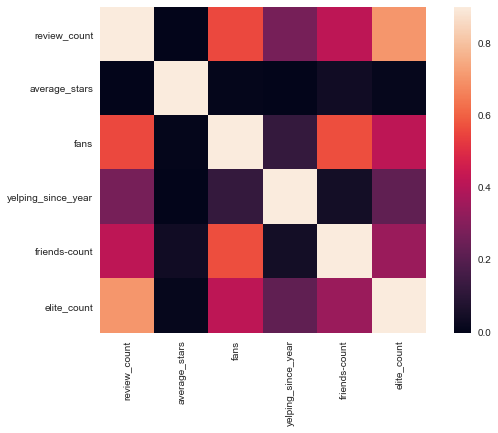

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corrmat = pandas_df.corr()
f,ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat,vmax = 0.9, square = True)